i_collecting=0.004588124201521968mA
i_transmitting=0.10479691535912776mA
i_high_power=0.10938503956064972mA
i_transmitting=0.03602415496192862mA
i_high_power=0.04061227916345059mA
i_transmitting=0.01877359702021206mA
i_high_power=0.02336172122173403mA
i_transmitting=0.013018293522661395mA
i_high_power=0.017606417724183365mA
i_transmitting=0.010139681278639744mA
i_high_power=0.014727805480161713mA
i_transmitting=0.007260428419451818mA
i_high_power=0.011848552620973786mA


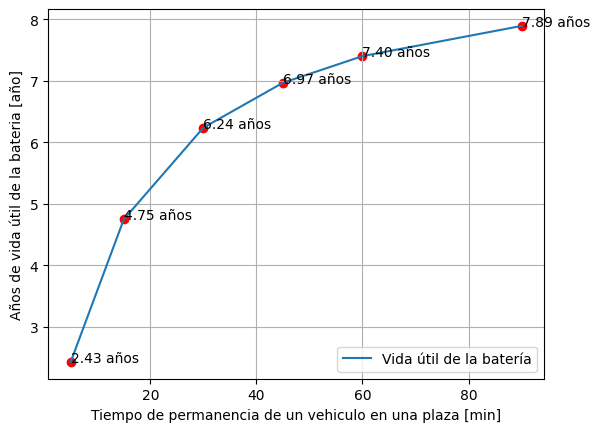

In [4]:
"""
Batterry life-time estimation
"""
import matplotlib.pyplot as plt

# LOW POWER SUBSYSTEM
i_ulp_a = 400e-3  # (ma) consumo ULP activo
i_ulp_off = 10e-3  # (ma) consumo ULP off
t_ulp_a = 2  # (ms)
t_ulp_off = 500  # (ms)

i_ulp = (i_ulp_a * t_ulp_a + i_ulp_off * t_ulp_off) / (t_ulp_a + t_ulp_off)
i_magnetometer = 20e-3

i_low_power = i_ulp + i_magnetometer


# HIGH POWER SUBSYSTEM
t_a = 30 * 60 * 1000  # (ms) tiempo que permanece cada auto en un lugar

## COLLECTING
t_esp_a = 300 #298.425  # (ms) esp  modo activo durante la medicion laser
i_esp_a = 25  # (mA) correinte que consume la esp en modo activo
t_laser_on = 40 #40.733  # (ms) tiempo laser activo
i_laser_on = 19  # (mA) corriente laser activo

i_esp_collecting = (t_esp_a * i_esp_a) / (t_a + t_esp_a)
i_laser_collecting = (t_laser_on * i_laser_on) / (t_a + t_esp_a)
i_collecting = i_esp_collecting + i_laser_collecting

print(f"{i_collecting=}mA")

## TRANSMITTING
t_sx_tx = 175  # (ms)
t_sx_rx = 1000  # (ms)
t_sx_stby = 27 #26 + 0.709  # (ms)
t_esp_a = t_sx_stby
t_esp_ls = t_sx_tx + t_sx_rx

i_esp_a = 25  # (mA) correinte que consume la esp en modo activo
i_esp_ls = 0.8  # (mA) esp en modo light sleep
i_sx_stby = 1.5e-3  # (mA)
i_sx_tx = 100  # (mA)
i_sx_rx = 12  # (mA)

# Definir una lista de valores de t_a en minutos
t_a_minutes = [5, 15, 30, 45, 60, 90] #, 120, 180, 300]

battery = 3000

# Convertir los valores de t_a a milisegundos
t_a_values = [t * 60 * 1000 for t in t_a_minutes]

years_list = []
for t_a in t_a_values:
    # Calcula los valores de corriente para el nuevo t_a
    i_transmitting_esp = (i_esp_a * t_esp_a + i_esp_ls * t_esp_ls) / (
        t_a + t_esp_a + t_esp_ls
    )
    i_transmitting_sx = (
        t_a * i_sx_stby + t_sx_stby * i_sx_stby + t_sx_rx * i_sx_rx + t_sx_tx * i_sx_tx
    ) / (t_a + t_sx_stby + t_sx_rx + t_sx_tx)
    
    i_transmitting = i_transmitting_esp + i_transmitting_sx
    print(f"{i_transmitting=}mA")
    
    i_high_power = i_collecting + i_transmitting
    print(f"{i_high_power=}mA")

    # Calcula el valor de la corriente total en modo alto poder
    i_high_power = i_collecting + i_transmitting

    # Calcula los años de vida útil de la batería para el valor de t_a actual
    years = (battery / (i_low_power + i_high_power)) / (24 * 365)
    years_list.append(years)

# Graficar los resultados
plt.plot(t_a_minutes, years_list, label='Vida útil de la batería')
plt.scatter(t_a_minutes, years_list, color='red', marker='o')

plt.xlabel('Tiempo de permanencia de un vehiculo en una plaza [min]')
plt.ylabel('Años de vida útil de la bateria [año]')
#plt.title('Vida útil de la batería en función del tiempo de permanencia de un vehiculo')

# Agregar etiquetas a los puntos en la gráfica
for t_a, years in zip(t_a_minutes, years_list):
    plt.text(t_a, years, f'{years:.2f} años', ha='left')

# Configurar la leyenda en la esquina inferior derecha
plt.legend(loc='lower right')

plt.grid(True)
plt.show()





In [8]:
plt.savefig('temp.png', dpi=plt.dpi)

AttributeError: module 'matplotlib.pyplot' has no attribute 'dpi'